# 2nd Year Calculus (Mr. P Solver)

Video Link: https://youtu.be/Teb28OFMVFc

Codes: https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa2szcEtxY0l4REVhR0xiVUV5MUIyQzl4bW1Cd3xBQ3Jtc0ttSWpmdGowajQ5S2owT21kRDBCMzNHUnhndmZEREI0akVpLWhRakJrRUlHX1BDN054UlJ1QUhYWlhfQ2VuR0F0Ql9FRFlrc09EZllRcGRHbF9VWnBfU0JXV195bk9JbWJWQnhCX1FQNGJQc3BWMHFYUQ&q=https%3A%2F%2Fgithub.com%2Flukepolson%2Fyoutube_channel%2Fblob%2Fmain%2FPython%2520Tutorial%2520Series%2Fmath2.ipynb&v=Teb28OFMVFc

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad, quad_vec
import sympy as smp
from sympy import *
from sympy.vector import *

In [55]:
x,y,z,t,u1,u2,u3,v1,v2,v3 = smp.symbols('x y z t u_1 u_2 u_3 v_1 v_2 v_3')

# Vectors and Geometry

In [56]:
a = np.array([2,3,7])
b = np.array([2,4,1])
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

### Addition and Multiplication

In [57]:
print(2*a +5*b)
display(2*u +5*v)

[14 26 19]


Matrix([
[2*u_1 + 5*v_1],
[2*u_2 + 5*v_2],
[2*u_3 + 5*v_3]])

### Dot products

In [58]:
print(np.dot(a,b))
display(u.dot(v))

23


u_1*v_1 + u_2*v_2 + u_3*v_3

### Cross products

In [59]:
print(np.cross(a,b))
display(u.cross(v))

[-25  12   2]


Matrix([
[ u_2*v_3 - u_3*v_2],
[-u_1*v_3 + u_3*v_1],
[ u_1*v_2 - u_2*v_1]])

### Length of vector

In [60]:
print(np.linalg.norm(a))

unorm = u.norm()
display(unorm)
display(unorm.subs([(u1,2), (u2,3),(u3,7)]))

7.874007874011811


sqrt(Abs(u_1)**2 + Abs(u_2)**2 + Abs(u_3)**2)

sqrt(62)

## Vector projection

Projection of $u$ on $v$,
$$ \text{proj}_v(u) = (u.\hat{v})\hat{v} = \frac{u \cdot v}{|v|^2} v $$

In [61]:
projab = np.dot(a,b)*b/np.linalg.norm(b)**2
print(projab)

projuv = u.dot(v)*v/v.norm()**2
display(projuv)

[2.19047619 4.38095238 1.0952381 ]


Matrix([
[v_1*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_2*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)],
[v_3*(u_1*v_1 + u_2*v_2 + u_3*v_3)/(Abs(v_1)**2 + Abs(v_2)**2 + Abs(v_3)**2)]])

## Lines

$$ \vec{r}(t) = \vec{r}_0 + t\vec{v} $$

In [62]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([4,3,4])
r = r0 + t*v
r

Matrix([
[4*t + 1],
[3*t + 1],
[4*t + 1]])

## Planes

$$ \vec{n} \cdot (P_0-\left<x,y,z\right>) = 0 $$

In [63]:
n = smp.Matrix([3,2,3])
P0 = smp.Matrix([2.2,3,2])
r = smp.Matrix([x,y,z])
n.dot(P0 - r)

-3*x - 2*y - 3*z + 18.6

**Example:** Find unit vector parallel to the line of intersection of the two planes $ 3x-6y-2z = 15 $ and $2x+y-2z=5$.
(Hint: It's going to be perpendicular to both normal vectors)

In [64]:
n1 = np.array([3,-6,-2])
n2 = np.array([2,1,-2])
vec = np.cross(n1,n2)
ans = vec/np.linalg.norm(vec)
ans

array([0.67909975, 0.09701425, 0.72760688])

# Vector Calculus

## Vector derivatives

In [65]:
r = smp.Matrix([4*t,6*smp.cos(5*t),t**3])
display(r)
diffr = smp.diff(r,t)
display(diffr)

Matrix([
[       4*t],
[6*cos(5*t)],
[      t**3]])

Matrix([
[           4],
[-30*sin(5*t)],
[      3*t**2]])

**Example:** Find the angle between the velocity and acceleration as a function of time $\theta(t)$ and also find the angle at $t=4s$. Plot $t$ vs $\theta(t)$ graph.

In [66]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm()))
theta.simplify()

acos(3*(t**3 + 125*sin(10*t))/(sqrt(Abs(t)**2 + 625*Abs(cos(5*t))**2)*sqrt(9*Abs(t**2)**2 + 900*Abs(sin(5*t))**2 + 16)))

In [67]:
theta.subs(t,4).evalf()  # evalf() evaluates a float value

0.681852695830224

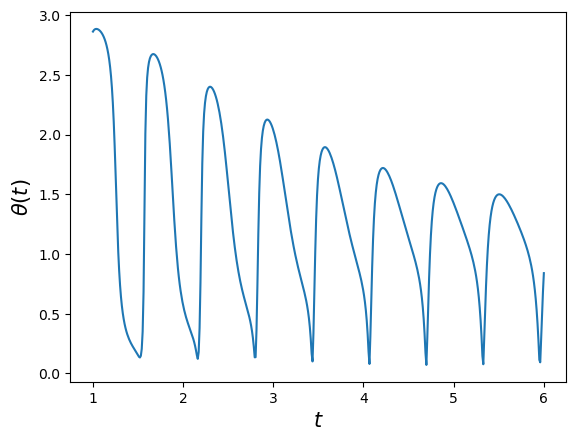

In [68]:
thetaf = smp.lambdify([t], theta)  # function

tt = np.linspace(1,6,500)
tht = thetaf(tt)
plt.plot(tt,tht)
plt.xlabel('$t$', fontsize=15)
plt.ylabel(r'$\theta(t)$', fontsize=15)
plt.show()

## Vector Integrals

In [69]:
r = smp.Matrix([smp.exp(-t**3), smp.sin(t), 5*t**3 + 4*t])
I = smp.Integral(r,t)
display(I)
display(I.doit())  # performs the integration

Integral(Matrix([
[  exp(-t**3)],
[      sin(t)],
[5*t**3 + 4*t]]), t)

Matrix([
[gamma(1/3)*lowergamma(1/3, t**3)/(9*gamma(4/3))],
[                                        -cos(t)],
[                              5*t**4/4 + 2*t**2]])

Some cases integrals can't be solved analytically. So we need to solve them numerically.

In [70]:
r1 = smp.Matrix([smp.exp(-t**2)*smp.cos(t)**3, smp.exp(-t**4), 1/(3+t**2)])
I1 = smp.Integral(r1, (t,0,1))
I1

Integral(Matrix([
[exp(-t**2)*cos(t)**3],
[          exp(-t**4)],
[        1/(t**2 + 3)]]), (t, 0, 1))

In [71]:
from scipy.integrate import quad_vec

rf = smp.lambdify([t],r1)
quad_vec(rf, 0,1)  # integration and error

(array([[0.53525785],
        [0.84483859],
        [0.30229989]]),
 3.5151979041265046e-14)

## Arclength

$$ L = \int_a^b \sqrt{dx^2 + dy^2 + dz^2} = \int_a^b \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } dt $$

Find arclength of $ \left< 0, 3t, 2t^2 \right> $ from $t=0$ to $t=1$.

In [72]:
r2= smp.Matrix([0, 3*t, 2*t**2])
display(r2)

f1 = smp.diff(r2,t).norm()
L= smp.integrate(f1, (t,0,1))
display(L)

# numerical
f1f = smp.lambdify([t], f1)
print('numerical solution in (0,1) is,', quad(f1f,0,1)[0])

Matrix([
[     0],
[   3*t],
[2*t**2]])

9*asinh(4/3)/8 + 5/2

numerical solution in (0,1) is, 3.735938824751624


## Other Relevant Quantities

If $ ds = \sqrt{dx^2 + dy^2 + dz^2} $ is the arclength element; the velocity will be $ ds/dt = \sqrt{(dx/dt)^2 + (dy/dt)^2 + (dz/dt)^2 } = |d\vec{r}/dt| = |\vec{v}| $. The other quantities of importance are;
1. Unit tangent vector: $ \vec{T} = \frac{d\vec{r}}{dt}\frac{1}{|d\vec{r}/dt|} = \vec{v}/|\vec{v}| $
2. Curvature: $ \kappa = |\frac{d\vec{T}}{dt}|\frac{1}{|\vec{v}|} $
3. Unit normal vector: $ \vec{N} = \frac{d\vec{T}/dt}{|d\vec{T}/dt|} $

*Example:* Find all these for $ \vec{r}(t) = \left<a\cos(t)e^t, b\sin(t), ct\right> $.

In [73]:
t, a, b, c = smp.symbols('t a b c', pos=True, real=True)
r = smp.Matrix([a*smp.cos(t)*smp.exp(t), b*smp.sin(t), c*t])
display('path', r)
v = smp.diff(r,t)
modv = v.norm()
display('velocity vector', v, 'magnitude of velocity', modv)

'path'

Matrix([
[a*exp(t)*cos(t)],
[       b*sin(t)],
[            c*t]])

'velocity vector'

Matrix([
[-a*exp(t)*sin(t) + a*exp(t)*cos(t)],
[                          b*cos(t)],
[                                 c]])

'magnitude of velocity'

sqrt(b**2*cos(t)**2 + c**2 + (a*exp(t)*sin(t) - a*exp(t)*cos(t))**2)

Get $\vec{T}, \kappa$ and $\vec{N}$,

In [74]:
T = v/modv
kappa = T.diff(t).norm()/modv
N = T.diff(t)/T.diff(t).norm()

In [75]:
print('at (t,a,b,c) = (2,3,4,5),')
display('unit tangent vector',T.subs([(t,2),(a,3),(b,4),(c,5)]).evalf(6))
display('curvature',kappa.subs([(t,2),(a,3),(b,4),(c,5)]).evalf(6))
display('unit normal vector',N.subs([(t,2),(a,3),(b,4),(c,5)]).evalf(6))

at (t,a,b,c) = (2,3,4,5),


'unit tangent vector'

Matrix([
[ -0.984293],
[-0.0557647],
[  0.167503]])

'curvature'

0.00775459

'unit normal vector'

Matrix([
[-0.152946],
[-0.204518],
[ -0.96684]])

**Plot of the curvature:**

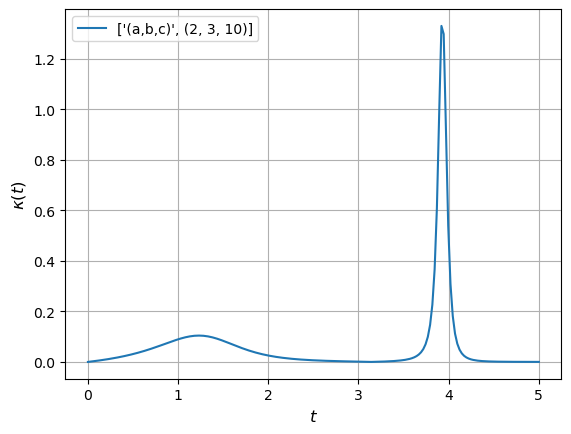

In [76]:
kf = smp.lambdify([t,a,b,c], kappa)
a1,b1,c1 = 2,3,10   # values of (a,b,c)
tt = np.linspace(0,5,200)
kk = kf(tt,a1,b1,c1)
plt.plot(tt,kk, label=['(a,b,c)', (a1,b1,c1)])
plt.legend()
plt.xlabel('$t$', fontsize=12)
plt.ylabel('$\kappa(t)$', fontsize=12)
plt.grid()
plt.show()

## Partial/Directional Derivatives

In [77]:
x, y, z = smp.symbols('x y z')

Partial derivatives $\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$ and $\frac{\partial^3 f}{\partial xy^2}$ of $ f(x,y)=y^2\sin(x+y) $.

In [78]:
fxy = y**2 * smp.sin(x+y)
display('function, f', fxy)
display('f_x', smp.diff(fxy, x))
display('f_y', smp.diff(fxy, y))
display('f_xyy', smp.diff(fxy, y, y, x))

'function, f'

y**2*sin(x + y)

'f_x'

y**2*cos(x + y)

'f_y'

y**2*cos(x + y) + 2*y*sin(x + y)

'f_xyy'

-y**2*cos(x + y) - 4*y*sin(x + y) + 2*cos(x + y)

**The Chain Rule**

Suppose $x$,$y$ and $z$ are functions of $t$ and $w= w(x,y,z)$. Find $dw/dt$.

In [79]:
t = smp.symbols('t')
x, y, z, w = smp.symbols('x y z w', cls = smp.Function)
x = x(t)
y = y(t)
z = z(t)
w = w(x,y,z)
display(w)
display('dw/dt', w.diff(t))

w(x(t), y(t), z(t))

'dw/dt'

Derivative(w(x(t), y(t), z(t)), x(t))*Derivative(x(t), t) + Derivative(w(x(t), y(t), z(t)), y(t))*Derivative(y(t), t) + Derivative(w(x(t), y(t), z(t)), z(t))*Derivative(z(t), t)

For some particular functions;

In [80]:
w1 = x* smp.sin(y)* smp.exp(-z**2)
display('function w1',w1,'dw1/dt',smp.diff(w1,t))
dw1dt = smp.diff(w1,t).subs([(x, 1/t**2), (y,14*t), (z, 2*t)])
display('for a given x(t), y(t) and z(t),', dw1dt.doit())

'function w1'

x(t)*exp(-z(t)**2)*sin(y(t))

'dw1/dt'

-2*x(t)*z(t)*exp(-z(t)**2)*sin(y(t))*Derivative(z(t), t) + x(t)*exp(-z(t)**2)*cos(y(t))*Derivative(y(t), t) + exp(-z(t)**2)*sin(y(t))*Derivative(x(t), t)

'for a given x(t), y(t) and z(t),'

-8*exp(-4*t**2)*sin(14*t)/t + 14*exp(-4*t**2)*cos(14*t)/t**2 - 2*exp(-4*t**2)*sin(14*t)/t**3

## Gradients ($ \nabla f $)

**Now we are dealing with particular coordinate systems.**

In [81]:
C = CoordSys3D('')
display(C, C.y, C.k)

.y

.k

In [82]:
f1 = C.x*smp.sin(C.y)
display('function', f1)

gradf1 = gradient(f1)  # gradient
gradf1m = gradf1.to_matrix(C)  # matrix form
display('gradient', gradf1, gradf1m)

display('for y=pi',gradf1.subs(C.y,smp.pi), gradf1m.subs(C.y,smp.pi))

'function'

.x*sin(.y)

'gradient'

(sin(.y))*.i + (.x*cos(.y))*.j

Matrix([
[   sin(.y)],
[.x*cos(.y)],
[         0]])

'for y=pi'

(-.x)*.j

Matrix([
[  0],
[-.x],
[  0]])

### Directional Derivatives

$$ D_u f = \nabla f \cdot u $$

In [83]:
uvec = 6*C.i +3*C.j -5*C.k  # writing a vector
u = uvec.normalize()  # making unit vector
display('u', u)
Duf1 = gradient(f1).dot(u) # directional derivative
display('directional derivative', Duf1)

'u'

(3*sqrt(70)/35)*.i + (3*sqrt(70)/70)*.j + (-sqrt(70)/14)*.k

'directional derivative'

3*sqrt(70)*.x*cos(.y)/70 + 3*sqrt(70)*sin(.y)/35

## Maxima and Minima of a 2D function

Extreme values of $f(x,y)$ can occur at;
1. Boundary points of the domain of $f(x,y)$.
2. Critical points ($f_x=f_y=0$)

At a point(a,b);
1. Local maxima: $ f_{xx}<0 $ and $ f_{xx}f_{yy} - f_{xy}^2>0 $.
2. Local minima: $ f_{xx}>0 $ and $ f_{xx}f_{yy} - f_{xy}^2>0 $.
3. Saddle point: $ f_{xx}f_{yy} - f_{xy}^2 < 0 $.
4. Inconclusive: $ f_{xx}f_{yy} - f_{xy}^2 = 0 $.

In [84]:
x, y = smp.symbols('x y', real=True)
f = x**2 -y**3 + x*y**2
display('function', f)

'function'

x**2 + x*y**2 - y**3

In [85]:
# solving df/dx = df/dy = 0
smp.solve([f.diff(x),f.diff(y)])

[{x: -9/2, y: -3}, {x: 0, y: 0}]

In [86]:
fxx = f.diff(x,x)
fyy = f.diff(y,y)
fxy = f.diff(x,y)

In [87]:
x1, y1 = -9/2, -3   # input the point
fxx1 = fxx.subs([(x,x1),(y,y1)]).evalf()
D1 = (fxx*fyy-fxy**2).subs([(x,x1),(y,y1)]).evalf()
print('Given point is', (x1,y1))
display('fxx', fxx1)
display('fxx*fyy - fxy**2', D1)

Given point is (-4.5, -3)


'fxx'

2.00000000000000

'fxx*fyy - fxy**2'

-18.0000000000000

In [88]:
if fxx1 < 0 and D1 > 0:
    print('local maxima')
elif fxx1 > 0 and D1 > 0:
    print('local minima')
elif D1 < 0:
    print('saddle point')
else:
    print('nothing can be said')

saddle point


## Lagrange Multipliers

Minimize $f(x,y,z)$ subject to the constraint $g(x,y,z)=0$. It requires to solve 2 equations $ \nabla f = \lambda \nabla g $ and $ g(x,y,z)=0 $.

**Example:** A space probe has the shape of an ellipsoid $ 4x^2 + y^2 + 4z^2 = 16 $ and after sitting in the sun for an hour, the temperature on its surface is given by $ T(x,y,z)=8x^2+4yz-16z+600 $. Find the hottest point on the surface.

**Solution:** Here, the function is $ f=T = 8x^2+4yz-16z+600 $ and the constraint is $ g=4x^2 + y^2 + 4z^2 - 16 = 0 $.

In [89]:
C = CoordSys3D('')

lam = smp.symbols('\lambda')
f = 8*C.x**2 +4*C.y*C.z -16*C.z +600
g = 4*C.x**2 +C.y**2 +4*C.z**2 -16

eq1 = gradient(f) - lam*gradient(g)
eq1m = eq1.to_matrix(C)
eq2 = g
display('f',f,'g',g, 'equation 1',eq1,eq1m, 'equation 2',eq2)

'f'

8*.x**2 + 4*.y*.z - 16*.z + 600

'g'

4*.x**2 + .y**2 + 4*.z**2 - 16

'equation 1'

(-8*.x*\lambda + 16*.x)*.i + (-2*.y*\lambda + 4*.z)*.j + (4*.y - 8*.z*\lambda - 16)*.k

Matrix([
[   -8*.x*\lambda + 16*.x],
[    -2*.y*\lambda + 4*.z],
[4*.y - 8*.z*\lambda - 16]])

'equation 2'

4*.x**2 + .y**2 + 4*.z**2 - 16

In [90]:
sols = smp.solve([eq1m,eq2]) # use the matrix to solve
for sol in sols:
    print('\n (x,y,z,lambda) =', sol)
    print('value of local maxima =',f.subs(sol).evalf())
print('\ncompare the values of local maxima and find the highest one,'
      ,'i.e. the highest temperature here')


 (x,y,z,lambda) = {.x: -4/3, .y: -4/3, .z: -4/3, \lambda: 2}
value of local maxima = 642.666666666667

 (x,y,z,lambda) = {.x: 0, .y: -2, .z: -sqrt(3), \lambda: sqrt(3)}
value of local maxima = 641.569219381653

 (x,y,z,lambda) = {.x: 0, .y: -2, .z: sqrt(3), \lambda: -sqrt(3)}
value of local maxima = 558.430780618347

 (x,y,z,lambda) = {.x: 0, .y: 4, .z: 0, \lambda: 0}
value of local maxima = 600.000000000000

 (x,y,z,lambda) = {.x: 4/3, .y: -4/3, .z: -4/3, \lambda: 2}
value of local maxima = 642.666666666667

compare the values of local maxima and find the highest one, i.e. the highest temperature here


## Multiple Integrals

In rare cases it can be solved symbolically.

$$ \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x^2e^x dzdydx $$

In [91]:
x, y, z = smp.symbols('x y z')
f1 = x**2*smp.exp(x)
smp.integrate(f1, (z,3, 4-x**2-y**2), (y,0,1-x**2), (x,0,1))

-40252/3 + 4936*E

We need to do this numerically for most of the cases.

**Example:** $$ \int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} xe^{-y}\cos(z)dzdydx $$

**`tplquad`**: function to perform triple integrals in the module `scipy.integrate`.

In [92]:
from scipy.integrate import tplquad
f = lambda z,y,x: x*np.exp(-y)*np.cos(z)
x1, x2 = 0, 1
y1, y2 = 0, lambda x: 1 -x**2
z1, z2 = 3, lambda x, y: 4 -x**2 -y**2
tplquad(f, x1, x2, y1, y2, z1, z2)[0]

-0.09109526451447894

## Integrals and Vector Fields

## Line Integrals (Scalar)

Given curve, $ \vec{r}(t) = \left< g(t), h(t), k(t) \right> $. The line integral of $f(x,y,z)$ along the curve is,
$$ \int_C f(x,y,z) ds = \int_a^b f(g(t), h(t), k(t))|d\vec{r}/dt|dt $$

In [93]:
t = smp.symbols('t', real=True)
x,y,z,f = smp.symbols('x y z f', cls=smp.Function, real=True)
x = x(t)
y = y(t)
z = z(t)
f = f(x,y,z)
r = smp.Matrix([x,y,z])

integrand = f*r.diff(t).norm()
smp.Integral(integrand, (t, a, b))

Integral(sqrt(Abs(Derivative(x(t), t))**2 + Abs(Derivative(y(t), t))**2 + Abs(Derivative(z(t), t))**2)*f(x(t), y(t), z(t)), (t, a, b))

Suppose,
1. $ \vec{r}(t) = \left<\cos(t),\sin(t),t\right>; \hspace{3mm} $ (Helix)
2. $ f(x,y,z) = 2xy + \sqrt{z} $

We are going from $t=0$ to $t=2\pi$.

In [94]:
integrand1 = integrand.subs([(f,2*x*y + smp.sqrt(z)),
                            (x, smp.cos(t)),
                            (y, smp.sin(t)),
                            (z, t)]).doit().simplify()
display(smp.Integral(integrand1, (t, 0, 2*smp.pi)))
smp.integrate(integrand1, (t, 0, 2*smp.pi)).simplify()

Integral(sqrt(2)*(sqrt(t) + sin(2*t)), (t, 0, 2*pi))

8*pi**(3/2)/3

Most of the cases can't be solved symbolically.

**Example:** Given,
1. $ \vec{r}(t) = \left<3\cos(t), 2\sin(t), e^{t/4} \right> $
2. $ f(x,y,z)=2xy+\sqrt{z} $

We are going from $t=0$ to $t=2\pi$.

In [95]:
integrand2 = integrand.subs([(f, 2*x*y+smp.sqrt(z)),
                            (x, 3*smp.cos(t)),
                            (y, 2*smp.sin(t)),
                            (z, smp.exp(t/4))]).doit().simplify()
display(smp.Integral(integrand2, (t, 0, 2*smp.pi)))
#smp.integrate(integrand2, (t, 0, 2*smp.pi)).simplify()
# no answer

Integral((exp(t/8) + 6*sin(2*t))*sqrt(exp(t/2) + 80*sin(t)**2 + 64)/4, (t, 0, 2*pi))

Integration using `quad` function of `scipy.integrate`:

In [96]:
from scipy.integrate import quad
integrand2f = smp.lambdify([t], integrand2)
quad(integrand2f, 0, 2*np.pi)[0]

24.294733741870633

## Line Integrals (Vector)

Given, $\vec{r}(t) = \left< g(t), h(t), k(t) \right>$. The line integral of $\vec{F}(x,y,z)$ along the curve is;

$$ \int_C \vec{F}(x,y,z) \cdot d\vec{r} = \int_a^b\vec{F}(g(t), h(t), k(t)) \cdot \frac{d\vec{r}}{dt} dt $$

In [97]:
t = smp.symbols('t', real=True)
x,y,z,F1,F2,F3 = smp.symbols('x y z F_1 F_2 F_3',cls=smp.Function,real=True)
x, y, z = x(t), y(t), z(t)
F1, F2, F3 = F1(x,y,z), F2(x,y,z), F3(x,y,z)
r = smp.Matrix([x, y, z])
F = smp.Matrix([F1, F2, F3])

integrand = F.dot(r.diff(t))
display(smp.Integral(integrand, (t,a,b)).simplify())

Integral(F_1(x(t), y(t), z(t))*Derivative(x(t), t) + F_2(x(t), y(t), z(t))*Derivative(y(t), t) + F_3(x(t), y(t), z(t))*Derivative(z(t), t), (t, a, b))

**Example:** Find line integral of $ \vec{F} = \left< \sqrt{z}, -2x, \sqrt{y}\right> $ along the curve $ \vec{r}(t) = \left<t, t^2, t^4 \right> $ from $t=0$ to $t=1$.

In [98]:
integrand1 = integrand.subs([(F1,smp.sqrt(z)),(F2,-2*x),(F3,smp.sqrt(y)),
                             (x,t),(y,t**2),(z,t**4)]).doit().simplify()
display(smp.Integral(integrand1, (t,0,1)))
smp.integrate(integrand1, (t,0,1))

Integral(t**2*(4*t*Abs(t) - 3), (t, 0, 1))

-1/5

Many of the integrals can't be solved symbolically and we must do that numerically.

**Example:** Find line integral of $ \vec{F} = \left< \sqrt{|z|}, -2x, \sqrt{|y|}\right> $ 
    along the curve $ \vec{r}(t) = \left<3\cos^2(t), t^2, 2\sin(t) \right> $ from $t=0$ to $t=2\pi$.

In [99]:
integrand2 = integrand.subs([(F1,smp.sqrt(smp.Abs(z))),
                             (F2,-2*x),
                             (F3,smp.sqrt(smp.Abs(y))),
        (x,3*smp.cos(t)**2),(y,t**2),(z,2*smp.sin(t))]).doit().simplify()
display(smp.Integral(integrand2, (t,0,2*smp.pi)))
# can't be solved symbolically

Integral(2*(-6*t*cos(t) - 3*sqrt(2)*sin(t)*sqrt(Abs(sin(t))) + Abs(t))*cos(t), (t, 0, 2*pi))

In [100]:
from scipy.integrate import quad
integrand2f = smp.lambdify([t], integrand2)
quad(integrand2f, 0, 2*np.pi)[0]

-118.4352528130723

## Surface Integrals (Scalar)

Area of a surface is given by;
$$ A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv;
\hspace{4mm} where \hspace{2mm} \vec{r}=\vec{r}(u,v) $$

$\vec{r}$ denotes the surface and it's a function of 2 variables.

The surface integral of a scalar function $G(\vec{r})$ is given by;

$$ \iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv $$

In [101]:
#  r = r(u=rho, v=theta)
rho, th = smp.symbols('\\rho \\theta', pos=True, real=True)
x, y, z, G = smp.symbols('x y z G', cls=smp.Function, real=True)
x, y, z = x(rho,th), y(rho,th), z(rho,th)
G = G(x,y,z)
r = smp.Matrix([x,y,z])

integrand = G* r.diff(rho).cross(r.diff(th)).norm()
integrand

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

**Example:** 2D parabola is given by $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$.
The surface density is given by $G(x,y,z)=x^2+y^2$. Find surface integral for $0<\rho<1$ and $0<\theta<2\pi$.

In [102]:
integrand1 = integrand.subs([(G,x**2+y**2),
    (x,rho*smp.cos(th)),(y,rho*smp.sin(th)),(z,rho**2)]).doit().simplify()
display(integrand1)
smp.integrate(integrand1, (rho,0,1), (th,0,2*smp.pi)).simplify()

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

pi*(1 + 25*sqrt(5))/60

*Complicated integrals can be solved numerically **(try it)**.*

## Surface Integtals(Vectors)

The surface integral of a vector function $\vec{G}(\vec{r})$ is given by;

$$ \iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv}\right) du dv $$

This is also known as flux of the vector field $\vec{G}$ through the surface $\vec{r}$.

In [103]:
# u = rho and v = theta
rho, th = smp.symbols('\\rho \\theta', pos=True, real=True)
x,y,z,G1,G2,G3 = smp.symbols('x y z G_1 G_2 G_3',cls=smp.Function,real=True)
x, y, z = x(rho,th), y(rho,th), z(rho,th)
G1, G2, G3 = G1(x,y,z), G2(x,y,z), G3(x,y,z)
r = smp.Matrix([x,y,z])
G = smp.Matrix([G1,G2,G3])

integrand = G.dot(r.diff(rho).cross(r.diff(th)))
integrand

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

**Example:** 2D parabola is given by $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$.
The vector field is given by $\vec{G}(x,y,z)=\left<y^2,z,0\right>$. Find the flux of $\vec{G}$ for $0<\rho<1$ and $0<\theta<\pi$ (through half of the surface).

In [104]:
integrand1 = integrand.subs([(G1,y**2),(G2,z),(G3,0),
    (x,rho*smp.cos(th)),(y,rho*smp.sin(th)),(z,rho**2)]).doit().simplify()
display(integrand1)
smp.integrate(integrand1, (rho,0,1), (th,0,smp.pi))

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

-4/5

*Complicated integrals can be solved numerically **(try it)**.*

## Explicit sympy Functionality

In [105]:
from sympy.vector import ParametricRegion

Find the mass of a cylinder with radius $a$ and height $h$ centered at origin with density $\rho_V(x,y)=x^2+y^2$.

In [106]:
C = CoordSys3D('')
a,h,r,th,z = smp.symbols(r'a h r \theta z',pos=True)
cylinder = ParametricRegion((r*smp.cos(th),r*smp.sin(th),z),
                        (r,0,a),(th,0,2*smp.pi),(z,0,h))
vector_integrate(C.x**2+C.y**2,cylinder)

pi*a**4*h/2

This cannot be done numerically. Using **`vector_integrate`** by defining field **`CoordSys3D`** and region **`ParametricRegion`** is the only way. See more in the link,  https://docs.sympy.org/latest/modules/vector/vector_integration.html